# Project 1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Load your data
df_texas_2022 = pd.read_csv('us-counties-2022.csv')
data_1 = pd.read_csv('age.csv')
data = pd.read_csv('unemployment.csv')

# Filtering data for Texas counties in the year 2022
df_texas_2022 = df_texas_2022[(df_texas_2022["state"] == 'Texas') & (df_texas_2022["county"] != 'Unknown') & (df_texas_2022["county"] != 'Pending County Assignment') & (df_texas_2022["date"].str.startswith('2022'))]

# Grouping by county and calculating the mean of deaths for each county
county_mean_deaths = df_texas_2022.groupby('county')['deaths'].mean().reset_index()


# Merging the datasets using the 'county' column as the common key
merged_data = pd.merge(county_mean_deaths, data_1, on='county')
merged_data = pd.merge(merged_data, data, on='county')
print(merged_data)


       county      deaths  Age(2022) unemployment(2022)
0    Anderson  239.605479       39.3              3.40%
1     Andrews   71.619178       32.2              3.20%
2    Angelina  480.402740       37.4              4.60%
3     Aransas   86.572603       49.7              5.30%
4      Archer   28.210959       42.7              3.40%
..        ...         ...        ...                ...
249      Wood  286.041096       48.7              4.50%
250    Yoakum   41.156164       30.1              4.00%
251     Young   92.175342       40.7              3.40%
252    Zapata   53.890411       30.6              6.90%
253    Zavala   67.246575       32.5              8.60%

[254 rows x 4 columns]


## Assigning our data to our measurement and factors

In [2]:
le = LabelEncoder()
# taking the average unemployemnt rate of US as our reference
merged_data['unemployment'] = le.fit_transform(merged_data['unemployment(2022)'].astype(str))>=20
# taking the age group of above 40 because during the whole duration of covid most number of deaths in US are associated for people who are 40 and above 
merged_data['Age'] = merged_data['Age(2022)']>=40
merged_data['Age'] = merged_data['Age'].astype(int)
merged_data['unemployment'] = merged_data['unemployment'].astype(int)
merged_data['itrx'] = merged_data['unemployment']*merged_data['Age']

deaths = merged_data['deaths'].to_numpy()
unemployment = merged_data['unemployment'].to_numpy()
age = merged_data['Age'].to_numpy()
itrx = merged_data['itrx'].to_numpy()
# printing our data set after assigning our hypothesis
print(merged_data)

       county      deaths  Age(2022) unemployment(2022)  unemployment  Age  \
0    Anderson  239.605479       39.3              3.40%             0    0   
1     Andrews   71.619178       32.2              3.20%             0    0   
2    Angelina  480.402740       37.4              4.60%             1    0   
3     Aransas   86.572603       49.7              5.30%             1    1   
4      Archer   28.210959       42.7              3.40%             0    1   
..        ...         ...        ...                ...           ...  ...   
249      Wood  286.041096       48.7              4.50%             1    1   
250    Yoakum   41.156164       30.1              4.00%             1    0   
251     Young   92.175342       40.7              3.40%             0    1   
252    Zapata   53.890411       30.6              6.90%             1    0   
253    Zavala   67.246575       32.5              8.60%             1    0   

     itrx  
0       0  
1       0  
2       0  
3       1  
4  

## Analyzing my measurement (deaths) to factor1 (unemployment)

Our intercept is  342.8511415525114 and our slope is 8.146578828122282
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                  0.003906
Date:                Wed, 01 Nov 2023   Prob (F-statistic):              0.950
Time:                        22:05:59   Log-Likelihood:                -2123.5
No. Observations:                 254   AIC:                             4251.
Df Residuals:                     252   BIC:                             4258.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

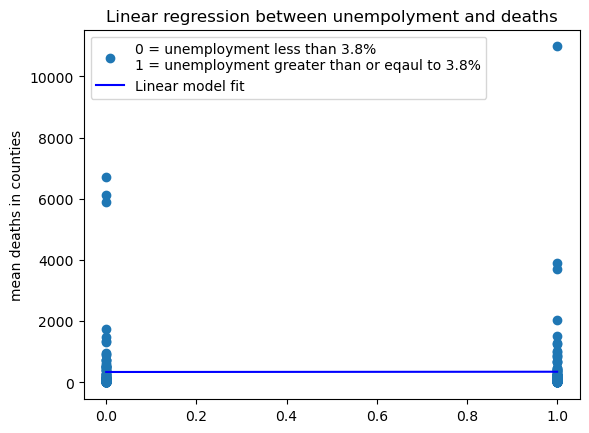

In [12]:
X1 = np.c_[np.ones_like(unemployment),unemployment]
Y = deaths
# caluclating slope and intercept for the linear analysis between unemployment and deaths
from numpy.linalg import inv
tmp = inv(np.matmul(np.transpose(X1),X1))

INTERCEPT, SLOPE = tmp @ np.transpose(X1) @Y
print("Our intercept is ",INTERCEPT, "and our slope is", SLOPE)

fitting_1 = np.zeros(2)
x1 = [0,1]
for i in range(2):
    fitting_1[i] = SLOPE*x1[i]+INTERCEPT

plt.plot(unemployment,Y,'o');
plt.plot(x1, fitting_1,'-b');
plt.ylabel("mean deaths in counties");
plt.legend(['0 = unemployment less than 3.8%\n1 = unemployment greater than or eqaul to 3.8%','Linear model fit']);
plt.title("Linear regression between unempolyment and deaths")

# using library to check my solution
results = sm.OLS(Y, X1).fit()
print(results.summary())


## Analyzing my measurement (deaths) to factor2 (age)


Our intercept is  567.1615459882581 and our slope is -490.4179026332954
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     14.85
Date:                Wed, 01 Nov 2023   Prob (F-statistic):           0.000148
Time:                        21:57:38   Log-Likelihood:                -2116.2
No. Observations:                 254   AIC:                             4236.
Df Residuals:                     252   BIC:                             4244.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------

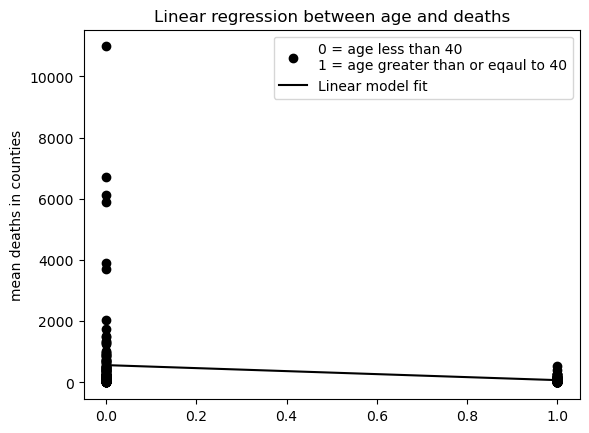

In [6]:
X2 = np.c_[np.ones_like(age),age]
Y = deaths
# caluclating slope and intercept for the linear analysis between age and deaths
from numpy.linalg import inv
tmp_1 = inv(np.matmul(np.transpose(X2),X2))

INTERCEPT_1, SLOPE_1 = tmp_1 @ np.transpose(X2) @Y
print("Our intercept is ",INTERCEPT_1, "and our slope is", SLOPE_1)

fitting_2 = np.zeros(2)
x2 = [0,1]
for i in range(2):
    fitting_2[i] = SLOPE_1*x2[i]+INTERCEPT_1
plt.plot(age,Y,'ko');
plt.plot(x2,fitting_2,'-k');
plt.ylabel("mean deaths in counties");
plt.legend(['0 = age less than 40\n1 = age greater than or eqaul to 40','Linear model fit']);
plt.title("Linear regression between age and deaths")


# using library to check my solution
results = sm.OLS(Y, X2).fit()
print(results.summary())



## Interaction analysis for my measurement and factors